# Chapter5 Data handling(kaggle)

## Titanic Project
- Data는 testset과 training set을 제공
- Testset으로 모델을 만든 후 trainset에 적용
- 결과제출은 [ID, 생존 예측] 형태로 제출
- 제출된 결과를 바탕으로 accuracy 점수로 등수를 산정함
- 분석가들은 기존 자신들이 시도했던 다양한 분석 방법을 사이트를 통해서 공유하고 있음

### 1 Load dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
test_df = pd.read_csv("./5/titanic/test.csv")
train_df = pd.read_csv("./5/titanic/train.csv")

In [5]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [6]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [7]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [8]:
train_df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [9]:
train_index = train_df.index
test_index = test_df.index

In [10]:
train_index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [11]:
y_train_df = train_df.pop("Survived")

In [12]:
y_train_df.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

### 2 Data preproecessing

In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
test_df.isnull().sum() 

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [16]:
train_df.isnull().sum() / len(train_df) * 100

Pclass      0.00
Name        0.00
Sex         0.00
Age        19.87
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.00
Cabin      77.10
Embarked    0.22
dtype: float64

#### 2.1 Decion 1 - Drop cabin

In [18]:
train_df["Cabin"].head()

PassengerId
1     NaN
2     C85
3     NaN
4    C123
5     NaN
Name: Cabin, dtype: object

In [19]:
del test_df["Cabin"]
del train_df["Cabin"]

In [21]:
all_df = train_df.append(test_df)
all_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S


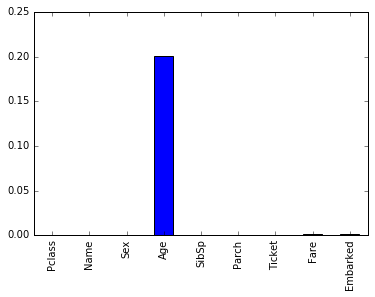

In [24]:
(all_df.isnull().sum() / len(all_df)).plot(kind='bar')
plt.show()

In [25]:
len(all_df)

1309

In [30]:
train_df["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [26]:
del all_df["Name"]

In [31]:
all_df["Ticket"].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [32]:
del all_df["Ticket"]

In [34]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})

In [35]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S


In [36]:
all_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
all_df["Embarked"] = all_df["Embarked"].replace({"S":0,"C":1,"Q":2, np.nan:99})

In [38]:
all_df["Embarked"].unique()

array([ 0,  1,  2, 99], dtype=int64)

In [39]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0


In [41]:
pd.get_dummies(all_df["Embarked"], prefix="embarked").head()

,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,
1,1.00,0.00,0.00,0.00
2,0.00,1.00,0.00,0.00
3,1.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00
5,1.00,0.00,0.00,0.00


In [42]:
matrix_df = pd.merge(
    all_df, pd.get_dummies(all_df["Embarked"], prefix="embarked"), 
    left_index=True, right_index=True)
matrix_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1.00,0.00,0.00,0.00
2,1,1,38.00,1,0,71.28,1,0.00,1.00,0.00,0.00
3,3,1,26.00,0,0,7.92,0,1.00,0.00,0.00,0.00
4,1,1,35.00,1,0,53.10,0,1.00,0.00,0.00,0.00
5,3,0,35.00,0,0,8.05,0,1.00,0.00,0.00,0.00


In [43]:
matrix_df.corr().head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
Pclass,1.00,-0.12,-0.41,0.06,0.02,-0.56,-0.05,0.10,-0.27,0.23,-0.06
Sex,-0.12,1.00,-0.06,0.11,0.21,0.19,0.07,-0.12,0.07,0.09,0.05
Age,-0.41,-0.06,1.00,-0.24,-0.15,0.18,0.07,-0.08,0.09,-0.02,0.06
SibSp,0.06,0.11,-0.24,1.00,0.37,0.16,-0.03,0.08,-0.05,-0.05,-0.02
Parch,0.02,0.21,-0.15,0.37,1.00,0.22,-0.03,0.07,-0.01,-0.10,-0.02


In [44]:
all_df.groupby("Pclass")["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [45]:
all_df.groupby("Sex")["Age"].mean()

Sex
0   30.59
1   28.69
Name: Age, dtype: float64

In [47]:
# all_df.loc[]
all_df.loc[ 
    (all_df["Pclass"] == 1) & (all_df["Age"].isnull()) , "Age"] .head()

PassengerId
32    nan
56    nan
65    nan
167   nan
169   nan
Name: Age, dtype: float64

In [48]:
all_df.loc[(all_df["Pclass"] == 1) & (
        all_df["Age"].isnull()), "Age"] = 39.16
all_df.loc[ (
    all_df["Pclass"] == 2) & all_df["Age"].isnull() , "Age"] = 29.51
all_df.loc[ ( all_df["Pclass"] == 3) & all_df["Age"].isnull(), "Age"] = 24.82

In [49]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [50]:
all_df.groupby("Pclass")["Fare"].mean()

Pclass
1   87.51
2   21.18
3   13.30
Name: Fare, dtype: float64

In [51]:
all_df[all_df["Fare"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,0,60.50,0,0,nan,0


In [52]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 13.30

In [53]:
del all_df["Embarked"]

In [54]:
all_df["Pclass"] = all_df["Pclass"].replace({1:"A",2:"B",3:"C"})

In [55]:
all_df = pd.get_dummies(all_df)
all_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,
1,0,22.00,1,0,7.25,0.00,0.00,1.00
2,1,38.00,1,0,71.28,1.00,0.00,0.00
3,1,26.00,0,0,7.92,0.00,0.00,1.00
4,1,35.00,1,0,53.10,1.00,0.00,0.00
5,0,35.00,0,0,8.05,0.00,0.00,1.00


In [56]:
all_df = pd.merge(
    all_df, matrix_df[["embarked_0", "embarked_1", "embarked_2", "embarked_99"]], 
    left_index=True, right_index=True)

In [57]:
train_df = all_df[all_df.index.isin(train_index)]
test_df = all_df[all_df.index.isin(test_index)]

In [58]:
train_df.head(3)

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,0.00,0.00,1.00,1.00,0.00,0.00,0.00
2,1,38.00,1,0,71.28,1.00,0.00,0.00,0.00,1.00,0.00,0.00
3,1,26.00,0,0,7.92,0.00,0.00,1.00,1.00,0.00,0.00,0.00


In [59]:
test_df.head(3)

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
892,0,34.50,0,0,7.83,0.00,0.00,1.00,0.00,0.00,1.00,0.00
893,1,47.00,1,0,7.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
894,0,62.00,0,0,9.69,0.00,1.00,0.00,0.00,0.00,1.00,0.00


### 3 Build Model

In [60]:
x_data = train_df.as_matrix()
y_data = y_train_df.as_matrix()

In [61]:
x_data.shape, y_data.shape

((891, 12), (891,))

In [62]:
y_data

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [63]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_data,y_data)

hello

d
d


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
cls.intercept_

array([ 0.18829674])

In [65]:
cls.coef_

array([[  2.60750665e+00,  -4.07586678e-02,  -3.25647165e-01,
         -8.49180077e-02,   2.48637600e-03,   1.11465026e+00,
          1.52999437e-01,  -1.07935295e+00,  -2.45258166e-01,
          1.66095755e-01,   6.65916090e-02,   2.00867547e-01]])

In [66]:
cls.predict(test_df.values)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [67]:
test_df.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [68]:
x_test = test_df.as_matrix()
y_test =cls.predict(x_test)
y_test 

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [69]:
result = np.concatenate( (test_index.values.reshape(-1,1),
                 cls.predict(x_test).reshape(-1,1)  ) , axis=1)
result[:5]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   1]], dtype=int64)

In [71]:
df_submssion =pd.DataFrame(result, columns=["PassengerId","Survived"])
df_submssion.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [72]:
df_submssion.to_csv("submission_result.csv",index=False)

## Advance House Price
- 기존 Boston House Price의 Advance 문제
- 80여개의 Feature를 Handling하는 연습 문제

- 어떤 데이터는 한 개가 여러개로 분리되어있음(방개수?)
- 데이터가 너무 많아 Drop해야하는 데이터가 많음
- 데이터에 대한 이해가 필요
- 일단 그냥 전처리해서 모델 만들기도 쉽지 않음
- Numeric Value와 Category Value를 나눠서 접근!!